In [1]:
import pandas as pd
import math
import numpy as np
import seaborn
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster  import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import mlxtend
%pip install mlxtend --upgrade
from mlxtend.plotting import plot_pca_correlation_graph

In [4]:
data = pd.read_csv('Data_Etude_de_Cas.csv', sep = ";", decimal=".")
data_2 = data.copy()
data_3 = data.copy()

# Nouvelle section

Base de Donnée

In [5]:
data

,Lat,Long,Month,Day,Year,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
0,18.30000,-21.05600,6.0,2.0,1992.0,0.48200,0.05500,0.0590,0.08500,0.01600,0.02900,0.01700,0.00700,0.18800
1,20.32500,-18.36600,6.0,5.0,1992.0,1.24800,0.00000,0.2770,0.24800,0.06100,0.33200,0.06400,0.10600,0.03900
2,20.36100,-18.34100,6.0,6.0,1992.0,1.51700,0.00000,0.2060,0.23400,0.06500,0.63600,0.05600,0.20700,0.03000
3,20.32200,-18.34400,6.0,13.0,1997.0,3.36300,0.00000,0.0000,0.13700,0.03500,2.05700,0.08500,0.00000,0.04800
4,18.30200,-21.07100,6.0,16.0,1992.0,1.32500,0.00000,0.1920,0.28800,0.05300,0.33600,0.15200,0.03200,0.17400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9479,28.68437,-19.87071,6.0,8.0,1998.0,0.03400,0.00000,0.0000,0.02120,0.00349,0.00621,0.00000,0.00000,0.01386
9480,36.30864,-17.49000,9.0,23.0,1998.0,0.05309,0.01009,0.0000,0.00790,0.00000,0.00000,0.00000,0.00000,0.03607
9481,-15.94449,-32.01183,10.0,9.0,1998.0,0.02809,0.00909,0.0000,0.00703,0.00000,0.00000,0.00000,0.00000,0.04449
9482,-29.59447,-43.23386,10.0,13.0,1998.0,0.16241,0.04541,0.0000,0.03478,0.01144,0.02664,0.00000,0.00000,0.01462


Localisation des prélèvements:

In [6]:
fig = px.scatter_geo(data, lat='Lat', lon='Long')
fig.update_layout(title = 'World map', title_x=0.5)
fig.show()

In [7]:
data.describe()

,Lat,Long,Month,Day,Year,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
count,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000,9484.000000,3945.000000,8242.000000,9442.000000,9295.000000,9269.000000,8500.000000,8088.000000,8520.000000
mean,-14.152567,-34.911447,5.455552,15.809027,1998.641885,1.544164,0.031781,0.057215,0.180654,0.042420,0.854588,0.073776,0.060148,0.052472
std,47.241192,71.528568,3.846315,8.852593,4.505356,3.687959,0.088617,0.201211,0.695565,0.116066,2.985958,0.581111,0.204949,0.141622
min,-79.366667,-179.998233,1.000000,1.000000,1988.000000,0.000000,0.000000,0.000000,-0.003200,0.000000,-0.003100,0.000000,-0.002900,0.000000
25%,-64.815108,-69.619517,1.000000,8.000000,1995.000000,0.153000,0.000000,0.004000,0.024768,0.006000,0.015000,0.000000,0.000000,0.000347
50%,-5.189000,-64.051000,5.000000,16.000000,1999.000000,0.391885,0.012417,0.017415,0.063000,0.018387,0.079457,0.004229,0.004407,0.018532
75%,34.007000,-9.210545,9.000000,23.000000,2002.000000,1.170462,0.041600,0.054700,0.139000,0.045000,0.372000,0.020000,0.035900,0.059000
max,65.258500,179.992883,12.000000,31.000000,2008.000000,92.413200,3.056330,9.125500,13.346127,4.611600,100.774100,25.644000,5.452643,2.391300


On enlève les colonnes qui ne nous intéressent pas pour l'instant

In [8]:
data = data.drop(columns = ['Lat', 'Long', 'Month', 'Day', 'Year'])

On enlève les valeurs inconnues:

In [9]:
data.dropna(inplace = True)

On amplifie les valeurs par log10:

In [10]:
data_log = np.log10(data)

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:329: RuntimeWarning:

divide by zero encountered in log10



In [11]:
data_log

,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
0,-0.316953,-1.259637,-1.229148,-1.070581,-1.795880,-1.537602,-1.769551,-2.154902,-0.725842
1,0.096215,-inf,-0.557520,-0.605548,-1.214670,-0.478862,-1.193820,-0.974694,-1.408935
2,0.180986,-inf,-0.686133,-0.630784,-1.187087,-0.196543,-1.251812,-0.684030,-1.522879
3,0.526727,-inf,-inf,-0.863279,-1.455932,0.313234,-1.070581,-inf,-1.318759
4,0.122216,-inf,-0.716699,-0.540608,-1.275724,-0.473661,-0.818156,-1.494850,-0.759451
...,...,...,...,...,...,...,...,...,...
9479,-1.468521,-inf,-inf,-1.673664,-2.457175,-2.206908,-inf,-inf,-1.858237
9480,-1.274987,-1.996109,-inf,-2.102373,-inf,-inf,-inf,-inf,-1.442854
9481,-1.551448,-2.041436,-inf,-2.153045,-inf,-inf,-inf,-inf,-1.351738
9482,-0.789387,-1.342848,-inf,-1.458670,-1.941574,-1.574466,-inf,-inf,-1.835053


In [12]:
data_log.describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning:

invalid value encountered in subtract

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning:

invalid value encountered in subtract



,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
count,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000
mean,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
25%,-0.838632,NaN,-2.301030,-1.665402,-2.166057,-2.200784,-2.698970,NaN,-1.585366
50%,-0.492144,-1.920819,-1.631953,-1.215915,-1.698978,-1.552842,-2.154902,-2.698970,-1.284870
75%,-0.162025,-1.346787,-1.134449,-0.848171,-1.322299,-0.943860,-1.698970,-1.864006,-1.065502
max,1.636196,0.485200,0.360631,0.192065,-0.056021,1.201854,1.180951,0.077144,0.225516


On affiche la quantité avant enlèvement des valeurs abérantes modélisées par les petits points noirs en dehors des box

<Axes: >

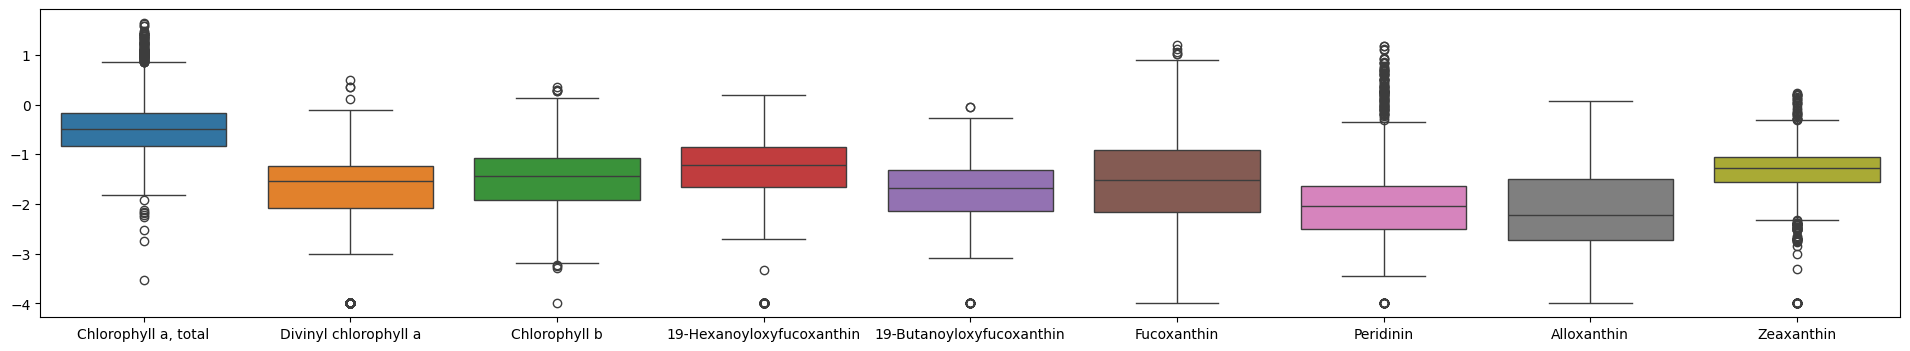

In [13]:
plt.figure(figsize=(24,4))
seaborn.boxplot(data_log)

In [14]:
data_log.describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning:

invalid value encountered in subtract

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning:

invalid value encountered in subtract



,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
count,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000
mean,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
25%,-0.838632,NaN,-2.301030,-1.665402,-2.166057,-2.200784,-2.698970,NaN,-1.585366
50%,-0.492144,-1.920819,-1.631953,-1.215915,-1.698978,-1.552842,-2.154902,-2.698970,-1.284870
75%,-0.162025,-1.346787,-1.134449,-0.848171,-1.322299,-0.943860,-1.698970,-1.864006,-1.065502
max,1.636196,0.485200,0.360631,0.192065,-0.056021,1.201854,1.180951,0.077144,0.225516


On enlève pour chaque colonnes les valeurs aberrantes au dessus de 95% et en dessous de 5%

In [15]:
for i in range (9):
  data_log.drop(data_log[(data_log[data_log.columns[i]] > np.percentile(data_log[data_log.columns[i]], 95))].index, inplace=True)
  data_log.drop(data_log[(data_log[data_log.columns[i]] < np.percentile(data_log[data_log.columns[i]], 5))].index, inplace=True)


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning:

invalid value encountered in subtract



In [16]:
data_log

,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
6,-1.387216,-1.920819,-inf,-1.958607,-2.397940,-2.397940,-3.000000,-inf,-1.522879
11,-0.756962,-1.924553,-1.743739,-1.375372,-1.742090,-1.782146,-2.450306,-2.396349,-1.940468
14,-0.723010,-1.496555,-1.800571,-1.479058,-2.058534,-1.547433,-1.906438,-2.533134,-1.636533
16,-0.694369,-1.117057,-1.881392,-1.556185,-2.151720,-1.723576,-2.395186,-2.627770,-1.330647
18,-0.737691,-1.581690,-1.863435,-1.419680,-2.116115,-1.782199,-inf,-2.295076,-1.094012
...,...,...,...,...,...,...,...,...,...
9144,-0.300162,-1.958607,-1.107905,-0.767004,-1.229148,-1.552842,-1.508638,-2.698970,-0.869666
9146,-0.463442,-1.327902,-1.070581,-0.841638,-1.229148,-1.568636,-2.045757,-3.000000,-1.113509
9147,-0.340084,-1.443697,-1.327902,-0.737549,-1.244125,-1.283997,-2.000000,-3.000000,-1.167491
9477,-1.190104,-1.666553,-1.951947,-1.876475,-2.115771,-2.401209,-2.809668,-3.091515,-1.465466


In [17]:
'''data_log.drop(data_log[(data_log['Chlorophyll a, total'] > np.percentile(data_log["Chlorophyll a, total"], 95))].index, inplace=True)
data_log.drop(data_log[(data_log['Divinyl chlorophyll a'] > np.percentile(data_log['Divinyl chlorophyll a'], 95))].index, inplace=True)
data_log.drop(data_log[(data_log['Chlorophyll b'] > np.percentile(data_log['Chlorophyll b'], 95))].index, inplace=True)
data_log.drop(data_log[(data_log['19-Hexanoyloxyfucoxanthin'] > np.percentile(data_log['19-Hexanoyloxyfucoxanthin'], 95))].index, inplace=True)
data_log.drop(data_log[(data_log['19-Butanoyloxyfucoxanthin'] > np.percentile(data_log['19-Butanoyloxyfucoxanthin'], 95))].index, inplace=True)
data_log.drop(data_log[(data_log['Fucoxanthin'] > np.percentile(data_log['Fucoxanthin'], 95))].index, inplace=True)
data_log.drop(data_log[(data_log['Peridinin'] > np.percentile(data_log['Peridinin'], 95))].index, inplace=True)
data_log.drop(data_log[(data_log['Alloxanthin'] > np.percentile(data_log['Alloxanthin'], 95))].index, inplace=True)
data_log.drop(data_log[(data_log['Zeaxanthin'] > np.percentile(data_log['Zeaxanthin'], 95))].index, inplace=True)'''

''' A vérifier !!!
for i in range (9):
  data_log.drop(data_log[(data_log.iloc[:,i] > data_log.describe().iloc[6,i])].index, inplace=True)'''

' A vérifier !!!\nfor i in range (9):\n  data_log.drop(data_log[(data_log.iloc[:,i] > data_log.describe().iloc[6,i])].index, inplace=True)'

On supprime les valeurs infinies

In [18]:
data_log.replace([-np.inf], np.nan, inplace=True)
data_log.dropna(inplace=True)

In [19]:
'''data_log.drop(data_log[(data_log['Chlorophyll a, total'] < np.percentile(data_log["Chlorophyll a, total"], 5))].index, inplace=True)
data_log.drop(data_log[(data_log['Divinyl chlorophyll a'] < np.percentile(data_log['Divinyl chlorophyll a'], 5))].index, inplace=True)
data_log.drop(data_log[(data_log['Chlorophyll b'] < np.percentile(data_log['Chlorophyll b'], 5))].index, inplace=True)
data_log.drop(data_log[(data_log['19-Hexanoyloxyfucoxanthin'] < np.percentile(data_log['19-Hexanoyloxyfucoxanthin'], 5))].index, inplace=True)
data_log.drop(data_log[(data_log['19-Butanoyloxyfucoxanthin'] < np.percentile(data_log['19-Butanoyloxyfucoxanthin'], 5))].index, inplace=True)
data_log.drop(data_log[(data_log['Fucoxanthin'] < np.percentile(data_log['Fucoxanthin'], 5))].index, inplace=True)
data_log.drop(data_log[(data_log['Peridinin'] < np.percentile(data_log['Peridinin'], 5))].index, inplace=True)
data_log.drop(data_log[(data_log['Alloxanthin'] < np.percentile(data_log['Alloxanthin'], 5))].index, inplace=True)
data_log.drop(data_log[(data_log['Zeaxanthin'] < np.percentile(data_log['Zeaxanthin'], 5))].index, inplace=True)'''
"""data_log['Chlorophyll a, total']=data_log['Chlorophyll a, total'].replace({-np.inf: -1.474955})
data_log['Divinyl chlorophyll a']=data_log['Divinyl chlorophyll a'].replace({-np.inf: -4.000000})
data_log['Chlorophyll b']=data_log['Chlorophyll b'].replace({-np.inf: -3.292430})
data_log['19-Hexanoyloxyfucoxanthin']=data_log['19-Hexanoyloxyfucoxanthin'].replace({-np.inf: -2.000000})
data_log['19-Butanoyloxyfucoxanthin']=data_log['19-Butanoyloxyfucoxanthin'].replace({-np.inf: -2.522879})
data_log['Fucoxanthin']=data_log['Fucoxanthin'].replace({-np.inf: -2.623423})
data_log['Peridinin']=data_log['Peridinin'].replace({-np.inf: -4.000000})
data_log['Alloxanthin']=data_log['Alloxanthin'].replace({-np.inf: -4.000000})
data_log['Zeaxanthin']=data_log['Zeaxanthin'].replace({-np.inf: -2.177905})"""

"data_log['Chlorophyll a, total']=data_log['Chlorophyll a, total'].replace({-np.inf: -1.474955})\ndata_log['Divinyl chlorophyll a']=data_log['Divinyl chlorophyll a'].replace({-np.inf: -4.000000})\ndata_log['Chlorophyll b']=data_log['Chlorophyll b'].replace({-np.inf: -3.292430})\ndata_log['19-Hexanoyloxyfucoxanthin']=data_log['19-Hexanoyloxyfucoxanthin'].replace({-np.inf: -2.000000})\ndata_log['19-Butanoyloxyfucoxanthin']=data_log['19-Butanoyloxyfucoxanthin'].replace({-np.inf: -2.522879})\ndata_log['Fucoxanthin']=data_log['Fucoxanthin'].replace({-np.inf: -2.623423})\ndata_log['Peridinin']=data_log['Peridinin'].replace({-np.inf: -4.000000})\ndata_log['Alloxanthin']=data_log['Alloxanthin'].replace({-np.inf: -4.000000})\ndata_log['Zeaxanthin']=data_log['Zeaxanthin'].replace({-np.inf: -2.177905})"

In [20]:
data_log

,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
11,-0.756962,-1.924553,-1.743739,-1.375372,-1.742090,-1.782146,-2.450306,-2.396349,-1.940468
14,-0.723010,-1.496555,-1.800571,-1.479058,-2.058534,-1.547433,-1.906438,-2.533134,-1.636533
16,-0.694369,-1.117057,-1.881392,-1.556185,-2.151720,-1.723576,-2.395186,-2.627770,-1.330647
84,-0.369562,-0.924005,-1.088385,-1.142892,-1.485132,-1.338921,-1.765508,-1.673368,-1.235010
85,-0.297863,-0.914096,-1.089063,-1.036932,-1.449284,-1.226669,-1.587304,-1.634644,-1.129635
...,...,...,...,...,...,...,...,...,...
9136,-0.318759,-1.408935,-1.026872,-0.806875,-1.124939,-1.214670,-2.000000,-2.301030,-1.075721
9144,-0.300162,-1.958607,-1.107905,-0.767004,-1.229148,-1.552842,-1.508638,-2.698970,-0.869666
9146,-0.463442,-1.327902,-1.070581,-0.841638,-1.229148,-1.568636,-2.045757,-3.000000,-1.113509
9147,-0.340084,-1.443697,-1.327902,-0.737549,-1.244125,-1.283997,-2.000000,-3.000000,-1.167491


Avant Analyse de la BDD

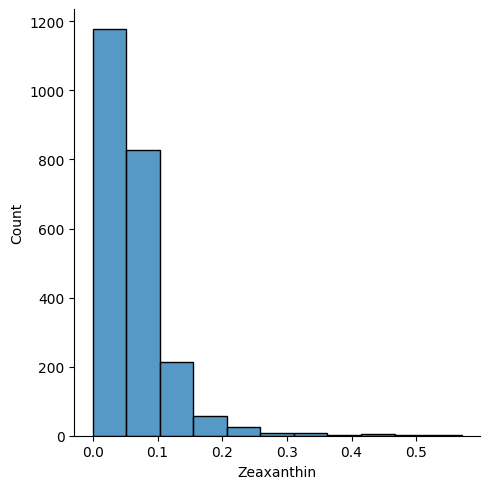

In [21]:
data5=data.copy()
data5.drop(data5[data5.iloc[:,0]>1.5].index, inplace=True)
seaborn.displot(data5, x="Zeaxanthin", binwidth=0.05)

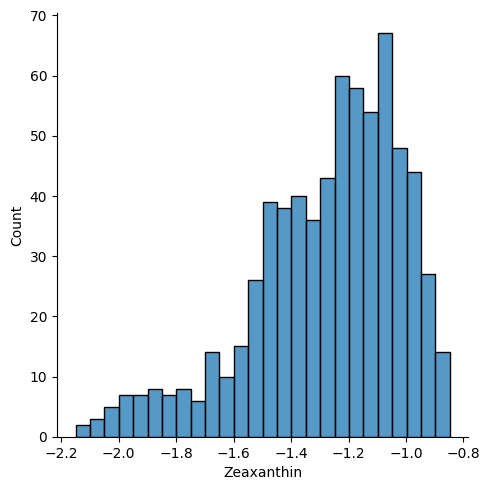

In [22]:
seaborn.displot(data_log, x="Zeaxanthin", binwidth=0.05)

<Axes: >

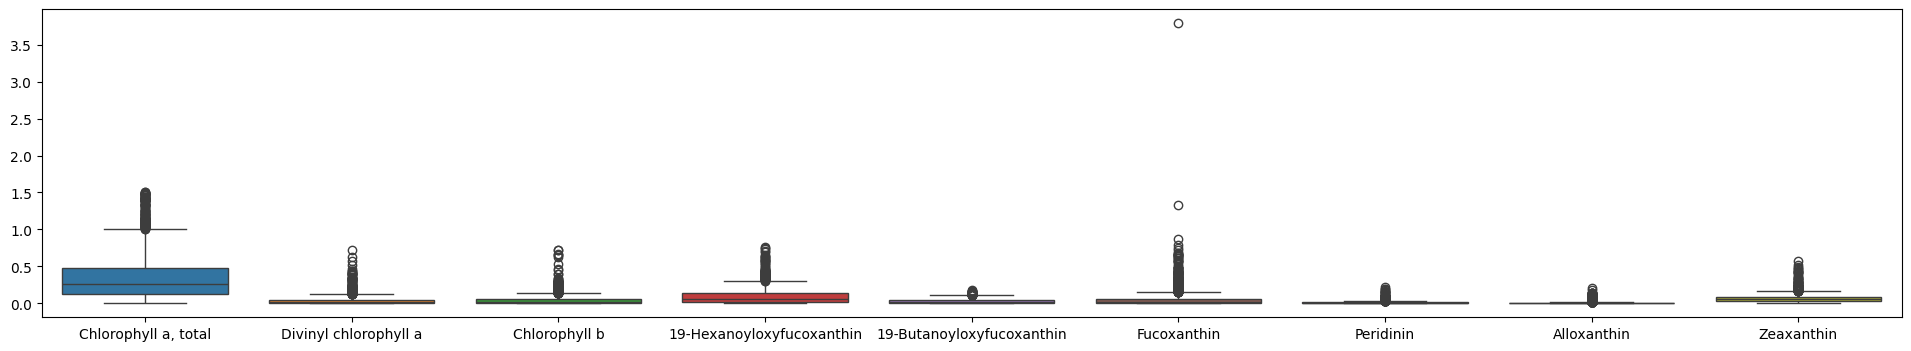

In [23]:
plt.figure(figsize=(24,4))
seaborn.boxplot(data5)

Après Analyse de la BDD

<Axes: >

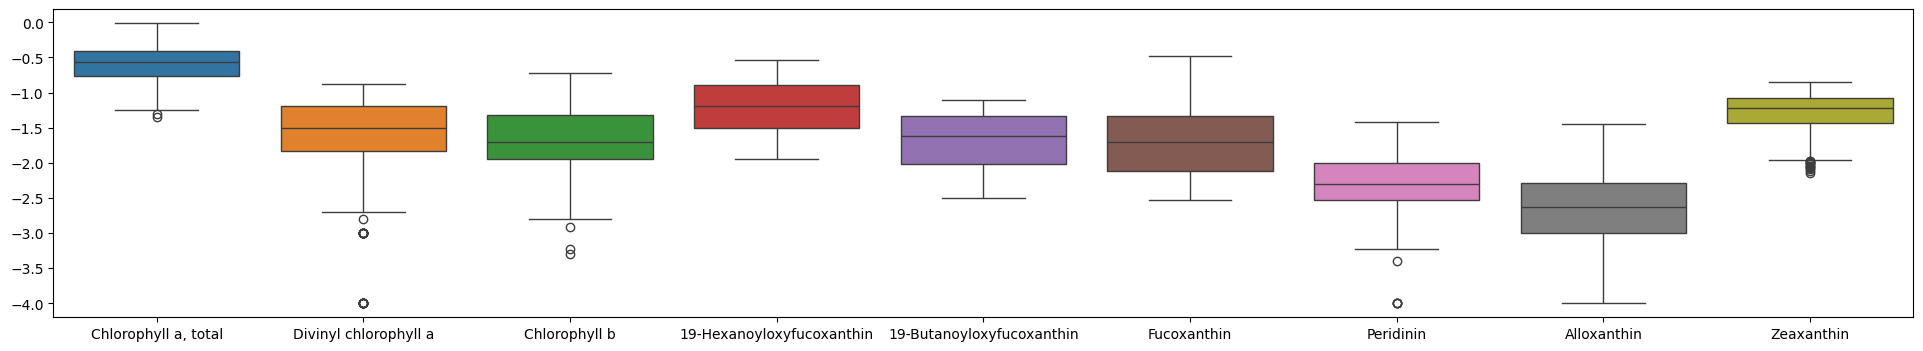

In [24]:
plt.figure(figsize=(24,4))
seaborn.boxplot(data_log)

In [25]:
data.describe()

,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
count,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000
mean,1.177884,0.036519,0.077473,0.104142,0.031722,0.303129,0.130585,0.026820,0.076976
std,3.357925,0.106035,0.167973,0.134397,0.042456,1.004749,0.804441,0.082071,0.124799
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.145000,0.000000,0.005000,0.021607,0.006823,0.006298,0.002000,0.000000,0.025980
50%,0.322000,0.012000,0.023337,0.060825,0.020000,0.028000,0.007000,0.002000,0.051895
75%,0.688612,0.045000,0.073376,0.141850,0.047610,0.113799,0.020000,0.013677,0.086000
max,43.270900,3.056330,2.294200,1.556200,0.878980,15.916740,15.168800,1.194383,1.680800


In [26]:
data_log

,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
11,-0.756962,-1.924553,-1.743739,-1.375372,-1.742090,-1.782146,-2.450306,-2.396349,-1.940468
14,-0.723010,-1.496555,-1.800571,-1.479058,-2.058534,-1.547433,-1.906438,-2.533134,-1.636533
16,-0.694369,-1.117057,-1.881392,-1.556185,-2.151720,-1.723576,-2.395186,-2.627770,-1.330647
84,-0.369562,-0.924005,-1.088385,-1.142892,-1.485132,-1.338921,-1.765508,-1.673368,-1.235010
85,-0.297863,-0.914096,-1.089063,-1.036932,-1.449284,-1.226669,-1.587304,-1.634644,-1.129635
...,...,...,...,...,...,...,...,...,...
9136,-0.318759,-1.408935,-1.026872,-0.806875,-1.124939,-1.214670,-2.000000,-2.301030,-1.075721
9144,-0.300162,-1.958607,-1.107905,-0.767004,-1.229148,-1.552842,-1.508638,-2.698970,-0.869666
9146,-0.463442,-1.327902,-1.070581,-0.841638,-1.229148,-1.568636,-2.045757,-3.000000,-1.113509
9147,-0.340084,-1.443697,-1.327902,-0.737549,-1.244125,-1.283997,-2.000000,-3.000000,-1.167491


In [27]:
data["Fucoxanthin"]

0       0.02900
1       0.33200
2       0.63600
3       2.05700
4       0.33600
         ...   
9479    0.00621
9480    0.00000
9481    0.00000
9482    0.02664
9483    0.14145
Name: Fucoxanthin, Length: 2660, dtype: float64

In [28]:
data.columns

Index(['Chlorophyll a, total', 'Divinyl chlorophyll a', 'Chlorophyll b',
       '19-Hexanoyloxyfucoxanthin', '19-Butanoyloxyfucoxanthin', 'Fucoxanthin',
       'Peridinin', 'Alloxanthin', 'Zeaxanthin'],
      dtype='object')

In [29]:
data_log.describe()

,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,-0.585956,-1.620531,-1.678386,-1.206381,-1.687328,-1.707908,-2.276469,-2.675105,-1.275585
std,0.232562,0.582379,0.434268,0.341623,0.391938,0.472989,0.390502,0.609992,0.263285
min,-1.347754,-4.000000,-3.292430,-1.952409,-2.494850,-2.522879,-4.000000,-4.000000,-2.150274
25%,-0.757956,-1.832556,-1.950570,-1.498599,-2.016604,-2.118839,-2.522879,-3.000000,-1.431476
50%,-0.571948,-1.508638,-1.698970,-1.187087,-1.620695,-1.698970,-2.301030,-2.632609,-1.224028
75%,-0.412570,-1.193311,-1.314690,-0.897137,-1.337242,-1.337242,-2.003235,-2.282047,-1.075333
max,-0.014125,-0.876148,-0.725842,-0.540608,-1.102373,-0.485360,-1.420216,-1.450637,-0.847712


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2660 entries, 0 to 9483
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Chlorophyll a, total       2660 non-null   float64
 1   Divinyl chlorophyll a      2660 non-null   float64
 2   Chlorophyll b              2660 non-null   float64
 3   19-Hexanoyloxyfucoxanthin  2660 non-null   float64
 4   19-Butanoyloxyfucoxanthin  2660 non-null   float64
 5   Fucoxanthin                2660 non-null   float64
 6   Peridinin                  2660 non-null   float64
 7   Alloxanthin                2660 non-null   float64
 8   Zeaxanthin                 2660 non-null   float64
dtypes: float64(9)
memory usage: 272.4 KB


## **Partie ACP :**

**Partie PCA avec la base de données trier au maximum (avec les valeurs > à 97%)**

---



In [31]:
data_log

,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
11,-0.756962,-1.924553,-1.743739,-1.375372,-1.742090,-1.782146,-2.450306,-2.396349,-1.940468
14,-0.723010,-1.496555,-1.800571,-1.479058,-2.058534,-1.547433,-1.906438,-2.533134,-1.636533
16,-0.694369,-1.117057,-1.881392,-1.556185,-2.151720,-1.723576,-2.395186,-2.627770,-1.330647
84,-0.369562,-0.924005,-1.088385,-1.142892,-1.485132,-1.338921,-1.765508,-1.673368,-1.235010
85,-0.297863,-0.914096,-1.089063,-1.036932,-1.449284,-1.226669,-1.587304,-1.634644,-1.129635
...,...,...,...,...,...,...,...,...,...
9136,-0.318759,-1.408935,-1.026872,-0.806875,-1.124939,-1.214670,-2.000000,-2.301030,-1.075721
9144,-0.300162,-1.958607,-1.107905,-0.767004,-1.229148,-1.552842,-1.508638,-2.698970,-0.869666
9146,-0.463442,-1.327902,-1.070581,-0.841638,-1.229148,-1.568636,-2.045757,-3.000000,-1.113509
9147,-0.340084,-1.443697,-1.327902,-0.737549,-1.244125,-1.283997,-2.000000,-3.000000,-1.167491


In [32]:
data_log=data_log.dropna()
scdfa=StandardScaler()
dfa_std=scdfa.fit_transform(data_log.astype(float))
dfa_std
pca = PCA()
pca.fit(dfa_std)

PCA()

In [33]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[5.1310349  1.49802994 0.85062362 0.50228868 0.35875801 0.30341254
 0.23663165 0.08754715 0.0448122 ]
[0.56928392 0.16620514 0.09437596 0.0557285  0.03980389 0.03366336
 0.02625408 0.00971328 0.00497187]


In [34]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(9)],
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,5.131035,57.0,57.0
1,Dim2,1.498030,17.0,74.0
2,Dim3,0.850624,9.0,83.0
3,Dim4,0.502289,6.0,89.0
4,Dim5,0.358758,4.0,93.0
5,Dim6,0.303413,3.0,96.0
6,Dim7,0.236632,3.0,99.0
7,Dim8,0.087547,1.0,100.0
8,Dim9,0.044812,0.0,100.0


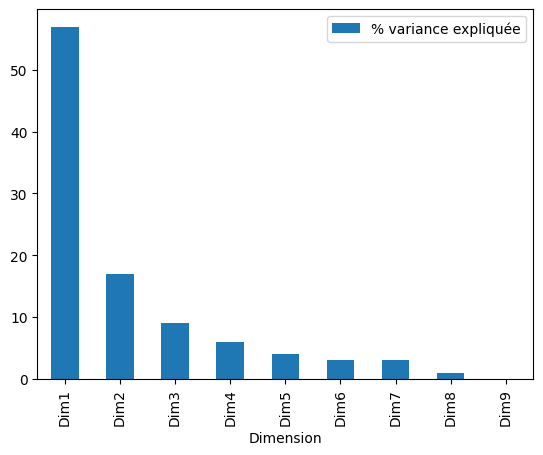

In [35]:
eig.plot.bar(x = "Dimension", y = "% variance expliquée") # permet un diagramme en barres
plt.show()

In [36]:
data_pca = pca.transform(data_log)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but PCA was fitted without feature names



*Peut être utilisé dans les K-mean*

---



In [37]:
# Transformation en DataFrame pandas
data_pca_df = pd.DataFrame({
    "Dim1" : data_pca[:,0],
    "Dim2" : data_pca[:,1],
    "Dim3" : data_pca[:,2],

})

# Résultat (premières lignes)
data_pca_df.head(3000)

,Dim1,Dim2,Dim3
0,3.912831,2.685004,-0.372297
1,3.952900,2.283444,-0.774588
2,4.383539,1.874272,-0.489254
3,2.933331,1.573114,-0.204273
4,2.743086,1.476750,-0.297398
...,...,...,...
681,2.753948,1.480291,-0.432457
682,2.799314,1.493896,-1.180147
683,3.258882,1.292053,-0.621750
684,3.119590,1.453788,-0.677135


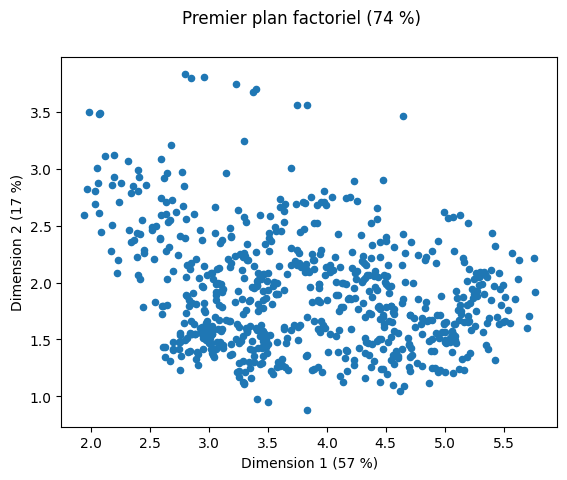

In [38]:

data_pca_df.plot.scatter("Dim1", "Dim2") # nuage de points
plt.xlabel("Dimension 1 (57 %)") # modification du nom de l'axe X
plt.ylabel("Dimension 2 (17 %)") # idem pour axe Y
plt.suptitle("Premier plan factoriel (74 %)") # titre général
plt.show()

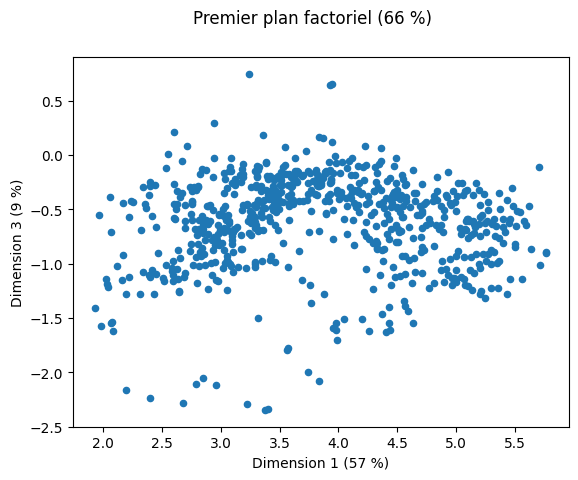

In [39]:
data_pca_df.plot.scatter("Dim1", "Dim3") # nuage de points
plt.xlabel("Dimension 1 (57 %)") # modification du nom de l'axe X
plt.ylabel("Dimension 3 (9 %)") # idem pour axe Y
plt.suptitle("Premier plan factoriel (66 %)") # titre général
plt.show()

DIAGRAMME DE CORRELATION PCA

In [40]:
data_pca_df

,Dim1,Dim2,Dim3
0,3.912831,2.685004,-0.372297
1,3.952900,2.283444,-0.774588
2,4.383539,1.874272,-0.489254
3,2.933331,1.573114,-0.204273
4,2.743086,1.476750,-0.297398
...,...,...,...
681,2.753948,1.480291,-0.432457
682,2.799314,1.493896,-1.180147
683,3.258882,1.292053,-0.621750
684,3.119590,1.453788,-0.677135


In [41]:
data_pca_df2 = data_pca_df.copy()

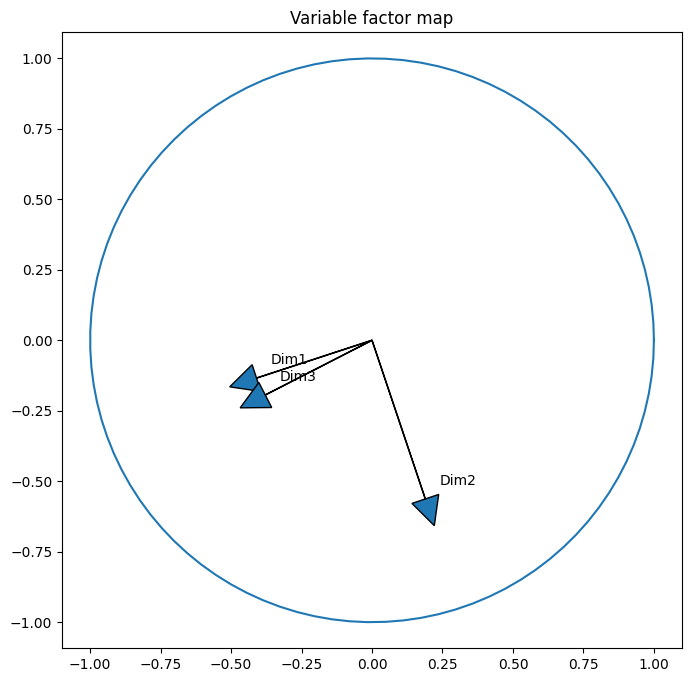

In [42]:
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, data_pca_df2.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             data_pca_df2.columns.values[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

/usr/local/lib/python3.10/dist-packages/mlxtend/externals/adjust_text.py:589: UserWarning:

Glyph 9 (	) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Glyph 9 (	) missing from current font.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9 (	) missing from current font.



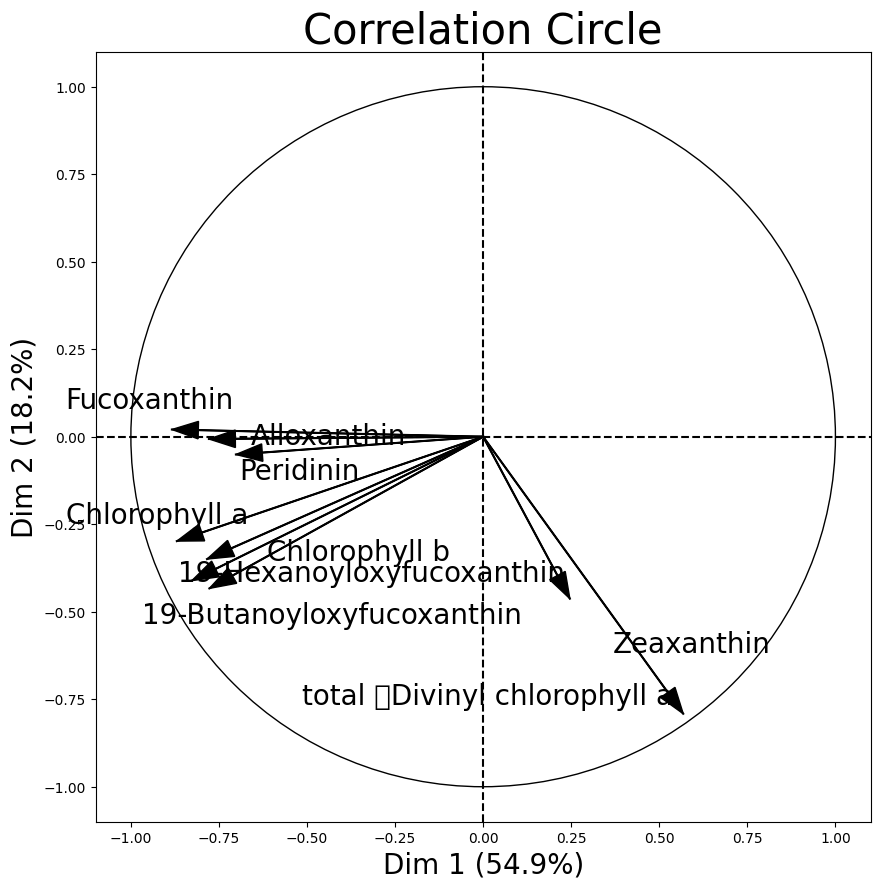

In [43]:
feature_names = ['Chlorophyll a', 'total 	Divinyl chlorophyll a' ,	'Chlorophyll b' ,	'19-Hexanoyloxyfucoxanthin' ,	'19-Butanoyloxyfucoxanthin' ,	'Fucoxanthin' ,	'Peridinin' ,	'Alloxanthin' 	,'Zeaxanthin']

figure, correlation_matrix = plot_pca_correlation_graph(data_log,
                                                        feature_names,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=10)

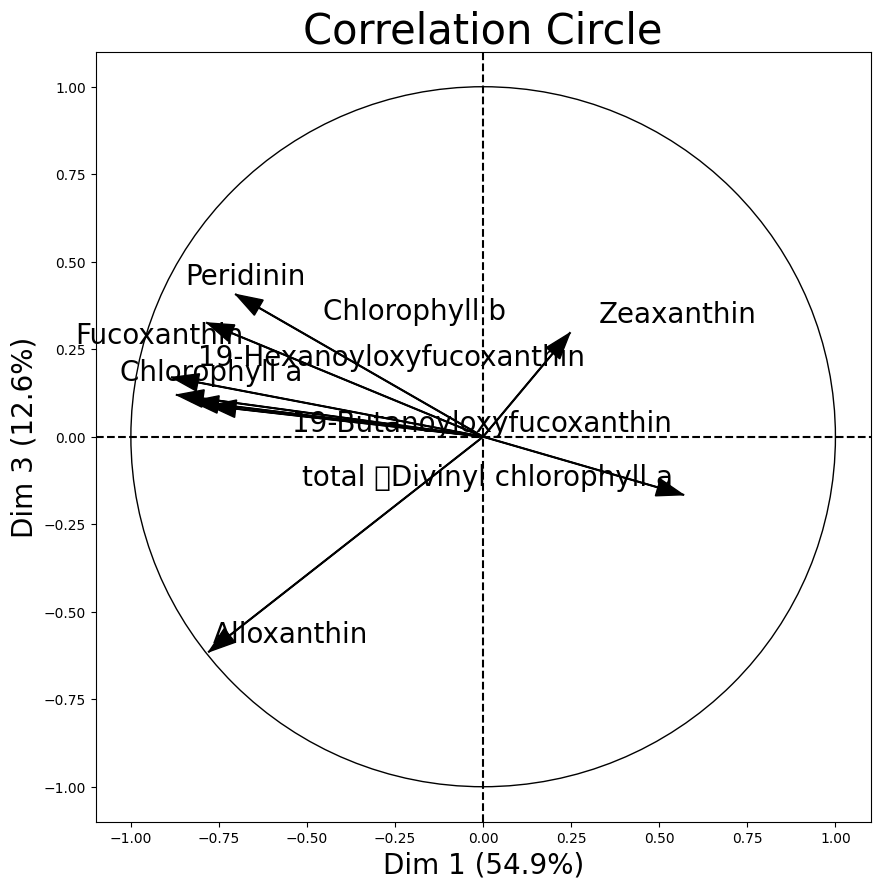

In [44]:
figure, correlation_matrix = plot_pca_correlation_graph(data_log,
                                                        feature_names,
                                                        dimensions=(1, 3),
                                                        figure_axis_size=10)

## Methode K means


In [45]:
data_pca_df

,Dim1,Dim2,Dim3
0,3.912831,2.685004,-0.372297
1,3.952900,2.283444,-0.774588
2,4.383539,1.874272,-0.489254
3,2.933331,1.573114,-0.204273
4,2.743086,1.476750,-0.297398
...,...,...,...
681,2.753948,1.480291,-0.432457
682,2.799314,1.493896,-1.180147
683,3.258882,1.292053,-0.621750
684,3.119590,1.453788,-0.677135


In [46]:
data_logKM = data_pca_df
"data_logKM.drop(columns = ['Chlorophyll b', '19-Hexanoyloxyfucoxanthin', '19-Butanoyloxyfucoxanthin', 'Fucoxanthin', 'Peridinin','Alloxanthin','Zeaxanthin'])"

"data_logKM.drop(columns = ['Chlorophyll b', '19-Hexanoyloxyfucoxanthin', '19-Butanoyloxyfucoxanthin', 'Fucoxanthin', 'Peridinin','Alloxanthin','Zeaxanthin'])"

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

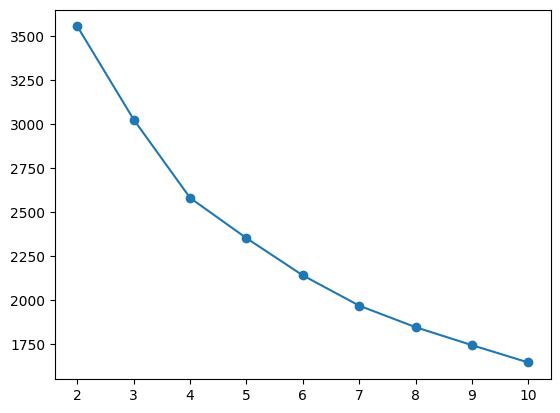

In [47]:
#Appliquer kmeans
cluster_range=[2,3,4,5,6,7,8,9,10]
inertie=[]

for c in cluster_range:
    kmeans=KMeans(init='k-means++',n_clusters=c).fit(dfa_std)
    inertie.append(kmeans.inertia_)

#print(inertie)

#dessiner les inerties calculé
plt.Figure()
plt.plot(cluster_range,inertie,marker='o')
plt.show()

In [48]:
#On part sur 3 clusters
kmeans=KMeans(n_clusters=4).fit(data_pca_df)

#affecter les cluster à la varialb e labels
labels=kmeans.labels_

#créer un dataset qui contient les valeurs de dfa_std
new_dfa=pd.DataFrame(data=data_pca_df,columns=data_logKM.columns)

#rajouter les labels à mon dataset dfa_std
new_dfa['labels_kmeans']=labels

new_dfa

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,Dim1,Dim2,Dim3,labels_kmeans
0,3.912831,2.685004,-0.372297,0
1,3.952900,2.283444,-0.774588,0
2,4.383539,1.874272,-0.489254,0
3,2.933331,1.573114,-0.204273,2
4,2.743086,1.476750,-0.297398,2
...,...,...,...,...
681,2.753948,1.480291,-0.432457,2
682,2.799314,1.493896,-1.180147,2
683,3.258882,1.292053,-0.621750,2
684,3.119590,1.453788,-0.677135,2


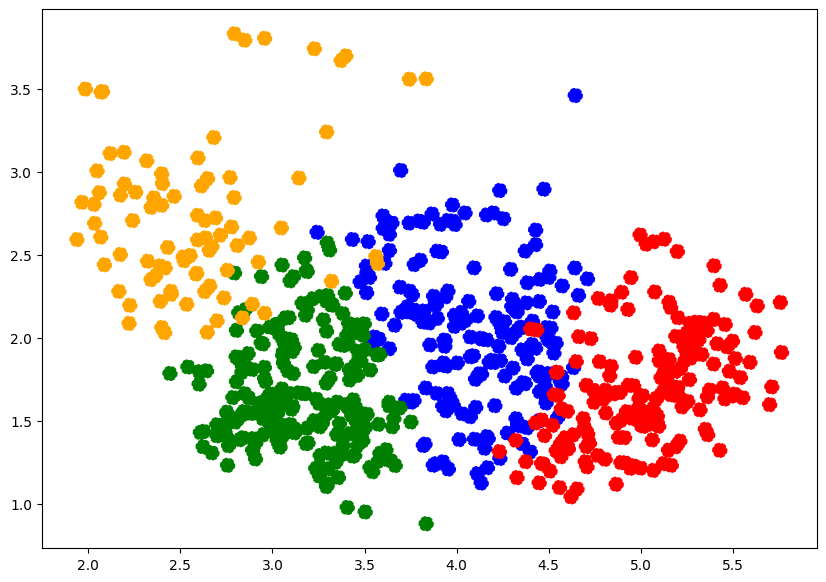

In [49]:
#visualiser les cluster en 2dimesions
fig,ax=plt.subplots(figsize=[10,7])
plt.scatter(new_dfa['Dim1'][new_dfa['labels_kmeans']==0],new_dfa['Dim2'][new_dfa['labels_kmeans']==0],
            color='blue',s=100,linestyle='--')
plt.scatter(new_dfa['Dim1'][new_dfa['labels_kmeans']==1],new_dfa['Dim2'][new_dfa['labels_kmeans']==1],
            color='red',s=100,linestyle='--')
plt.scatter(new_dfa['Dim1'][new_dfa['labels_kmeans']==2],new_dfa['Dim2'][new_dfa['labels_kmeans']==2],
            color='green',s=100,linestyle='--')
plt.scatter(new_dfa['Dim1'][new_dfa['labels_kmeans']==3],new_dfa['Dim2'][new_dfa['labels_kmeans']==3],
            color='orange',s=100,linestyle='--')

plt.show()

Même code que prédemment avec DIM1 et DIM3

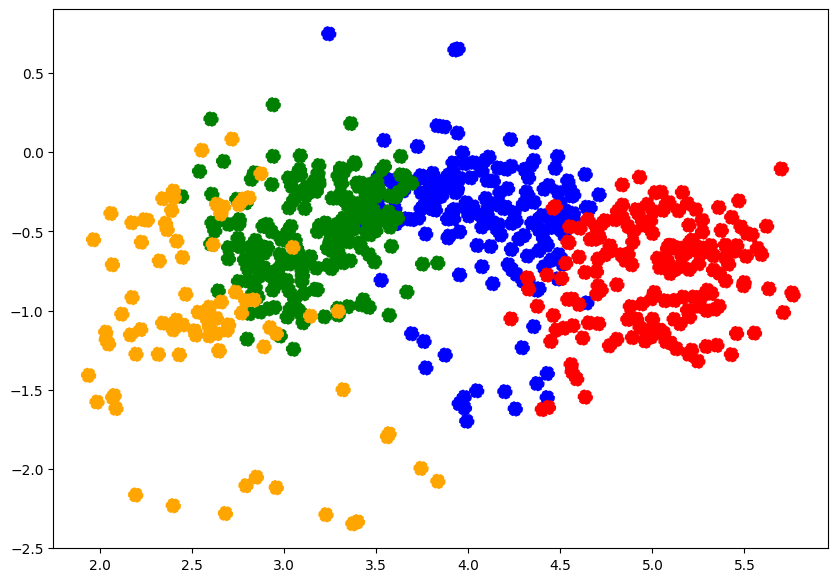

In [50]:
#visualiser les cluster en 2dimesions
fig,ax=plt.subplots(figsize=[10,7])
plt.scatter(new_dfa['Dim1'][new_dfa['labels_kmeans']==0],new_dfa['Dim3'][new_dfa['labels_kmeans']==0],
            color='blue',s=100,linestyle='--')
plt.scatter(new_dfa['Dim1'][new_dfa['labels_kmeans']==1],new_dfa['Dim3'][new_dfa['labels_kmeans']==1],
            color='red',s=100,linestyle='--')
plt.scatter(new_dfa['Dim1'][new_dfa['labels_kmeans']==2],new_dfa['Dim3'][new_dfa['labels_kmeans']==2],
            color='green',s=100,linestyle='--')
plt.scatter(new_dfa['Dim1'][new_dfa['labels_kmeans']==3],new_dfa['Dim3'][new_dfa['labels_kmeans']==3],
            color='orange',s=100,linestyle='--')

plt.show()

# K-Mean Propre Avec Dim 1 et Dim 2 PCA

Cette algorithme permet de déterminer une courbe logarithmique: 'elbow', coude = valeur optimale de k

Ici on observe que la valeur optimale est 4

In [51]:
data_2

,Lat,Long,Month,Day,Year,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
0,18.30000,-21.05600,6.0,2.0,1992.0,0.48200,0.05500,0.0590,0.08500,0.01600,0.02900,0.01700,0.00700,0.18800
1,20.32500,-18.36600,6.0,5.0,1992.0,1.24800,0.00000,0.2770,0.24800,0.06100,0.33200,0.06400,0.10600,0.03900
2,20.36100,-18.34100,6.0,6.0,1992.0,1.51700,0.00000,0.2060,0.23400,0.06500,0.63600,0.05600,0.20700,0.03000
3,20.32200,-18.34400,6.0,13.0,1997.0,3.36300,0.00000,0.0000,0.13700,0.03500,2.05700,0.08500,0.00000,0.04800
4,18.30200,-21.07100,6.0,16.0,1992.0,1.32500,0.00000,0.1920,0.28800,0.05300,0.33600,0.15200,0.03200,0.17400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9479,28.68437,-19.87071,6.0,8.0,1998.0,0.03400,0.00000,0.0000,0.02120,0.00349,0.00621,0.00000,0.00000,0.01386
9480,36.30864,-17.49000,9.0,23.0,1998.0,0.05309,0.01009,0.0000,0.00790,0.00000,0.00000,0.00000,0.00000,0.03607
9481,-15.94449,-32.01183,10.0,9.0,1998.0,0.02809,0.00909,0.0000,0.00703,0.00000,0.00000,0.00000,0.00000,0.04449
9482,-29.59447,-43.23386,10.0,13.0,1998.0,0.16241,0.04541,0.0000,0.03478,0.01144,0.02664,0.00000,0.00000,0.01462


In [52]:
data_log

,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
11,-0.756962,-1.924553,-1.743739,-1.375372,-1.742090,-1.782146,-2.450306,-2.396349,-1.940468
14,-0.723010,-1.496555,-1.800571,-1.479058,-2.058534,-1.547433,-1.906438,-2.533134,-1.636533
16,-0.694369,-1.117057,-1.881392,-1.556185,-2.151720,-1.723576,-2.395186,-2.627770,-1.330647
84,-0.369562,-0.924005,-1.088385,-1.142892,-1.485132,-1.338921,-1.765508,-1.673368,-1.235010
85,-0.297863,-0.914096,-1.089063,-1.036932,-1.449284,-1.226669,-1.587304,-1.634644,-1.129635
...,...,...,...,...,...,...,...,...,...
9136,-0.318759,-1.408935,-1.026872,-0.806875,-1.124939,-1.214670,-2.000000,-2.301030,-1.075721
9144,-0.300162,-1.958607,-1.107905,-0.767004,-1.229148,-1.552842,-1.508638,-2.698970,-0.869666
9146,-0.463442,-1.327902,-1.070581,-0.841638,-1.229148,-1.568636,-2.045757,-3.000000,-1.113509
9147,-0.340084,-1.443697,-1.327902,-0.737549,-1.244125,-1.283997,-2.000000,-3.000000,-1.167491


In [53]:
data_coord = data_2[['Lat', 'Long']].join(data_log).copy()
data_coord.dropna(inplace = True)
data_coord = data_coord.reset_index()

In [54]:
DATA_coord = pd.concat([data_coord, new_dfa["labels_kmeans"]],axis = 1)

In [55]:
DATA_coord

,index,Lat,Long,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin,labels_kmeans
0,11,35.50300,23.39000,-0.756962,-1.924553,-1.743739,-1.375372,-1.742090,-1.782146,-2.450306,-2.396349,-1.940468,0
1,14,28.11700,-115.63300,-0.723010,-1.496555,-1.800571,-1.479058,-2.058534,-1.547433,-1.906438,-2.533134,-1.636533,0
2,16,25.73300,-113.60000,-0.694369,-1.117057,-1.881392,-1.556185,-2.151720,-1.723576,-2.395186,-2.627770,-1.330647,0
3,84,-0.31000,-92.45000,-0.369562,-0.924005,-1.088385,-1.142892,-1.485132,-1.338921,-1.765508,-1.673368,-1.235010,2
4,85,-0.29200,-92.32300,-0.297863,-0.914096,-1.089063,-1.036932,-1.449284,-1.226669,-1.587304,-1.634644,-1.129635,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,9136,16.43100,61.24540,-0.318759,-1.408935,-1.026872,-0.806875,-1.124939,-1.214670,-2.000000,-2.301030,-1.075721,2
682,9144,21.82530,62.39720,-0.300162,-1.958607,-1.107905,-0.767004,-1.229148,-1.552842,-1.508638,-2.698970,-0.869666,2
683,9146,17.22220,59.77750,-0.463442,-1.327902,-1.070581,-0.841638,-1.229148,-1.568636,-2.045757,-3.000000,-1.113509,2
684,9147,20.56590,64.66610,-0.340084,-1.443697,-1.327902,-0.737549,-1.244125,-1.283997,-2.000000,-3.000000,-1.167491,2


In [56]:
DATA_coord.dropna(inplace=True)
DATA_coord

,index,Lat,Long,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin,labels_kmeans
0,11,35.50300,23.39000,-0.756962,-1.924553,-1.743739,-1.375372,-1.742090,-1.782146,-2.450306,-2.396349,-1.940468,0
1,14,28.11700,-115.63300,-0.723010,-1.496555,-1.800571,-1.479058,-2.058534,-1.547433,-1.906438,-2.533134,-1.636533,0
2,16,25.73300,-113.60000,-0.694369,-1.117057,-1.881392,-1.556185,-2.151720,-1.723576,-2.395186,-2.627770,-1.330647,0
3,84,-0.31000,-92.45000,-0.369562,-0.924005,-1.088385,-1.142892,-1.485132,-1.338921,-1.765508,-1.673368,-1.235010,2
4,85,-0.29200,-92.32300,-0.297863,-0.914096,-1.089063,-1.036932,-1.449284,-1.226669,-1.587304,-1.634644,-1.129635,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,9136,16.43100,61.24540,-0.318759,-1.408935,-1.026872,-0.806875,-1.124939,-1.214670,-2.000000,-2.301030,-1.075721,2
682,9144,21.82530,62.39720,-0.300162,-1.958607,-1.107905,-0.767004,-1.229148,-1.552842,-1.508638,-2.698970,-0.869666,2
683,9146,17.22220,59.77750,-0.463442,-1.327902,-1.070581,-0.841638,-1.229148,-1.568636,-2.045757,-3.000000,-1.113509,2
684,9147,20.56590,64.66610,-0.340084,-1.443697,-1.327902,-0.737549,-1.244125,-1.283997,-2.000000,-3.000000,-1.167491,2


In [57]:
fig = px.scatter_geo(DATA_coord,lat='Lat',lon='Long', color="labels_kmeans")
fig.update_layout(title = 'World map', title_x=1)
fig.show()

In [58]:
data_season = data_3[['Month']].join(data_log).copy()
data_season.dropna(inplace = True)
data_season = data_season.reset_index()
data_season

,index,Month,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
0,11,1.0,-0.756962,-1.924553,-1.743739,-1.375372,-1.742090,-1.782146,-2.450306,-2.396349,-1.940468
1,14,8.0,-0.723010,-1.496555,-1.800571,-1.479058,-2.058534,-1.547433,-1.906438,-2.533134,-1.636533
2,16,8.0,-0.694369,-1.117057,-1.881392,-1.556185,-2.151720,-1.723576,-2.395186,-2.627770,-1.330647
3,84,9.0,-0.369562,-0.924005,-1.088385,-1.142892,-1.485132,-1.338921,-1.765508,-1.673368,-1.235010
4,85,9.0,-0.297863,-0.914096,-1.089063,-1.036932,-1.449284,-1.226669,-1.587304,-1.634644,-1.129635
...,...,...,...,...,...,...,...,...,...,...,...
681,9136,1.0,-0.318759,-1.408935,-1.026872,-0.806875,-1.124939,-1.214670,-2.000000,-2.301030,-1.075721
682,9144,7.0,-0.300162,-1.958607,-1.107905,-0.767004,-1.229148,-1.552842,-1.508638,-2.698970,-0.869666
683,9146,12.0,-0.463442,-1.327902,-1.070581,-0.841638,-1.229148,-1.568636,-2.045757,-3.000000,-1.113509
684,9147,12.0,-0.340084,-1.443697,-1.327902,-0.737549,-1.244125,-1.283997,-2.000000,-3.000000,-1.167491


In [59]:
DATA_season= pd.concat([data_season, new_dfa["labels_kmeans"]],axis = 1)

<Axes: xlabel='Month', ylabel='labels_kmeans'>

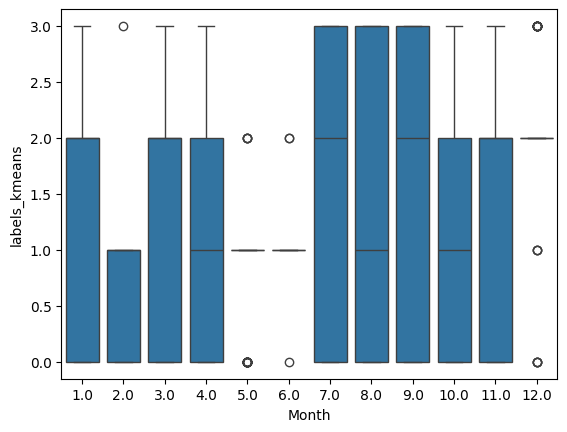

In [60]:
seaborn.boxplot(DATA_season, x=DATA_season['Month'], y="labels_kmeans")

In [61]:
DATA_season

,index,Month,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin,labels_kmeans
0,11,1.0,-0.756962,-1.924553,-1.743739,-1.375372,-1.742090,-1.782146,-2.450306,-2.396349,-1.940468,0
1,14,8.0,-0.723010,-1.496555,-1.800571,-1.479058,-2.058534,-1.547433,-1.906438,-2.533134,-1.636533,0
2,16,8.0,-0.694369,-1.117057,-1.881392,-1.556185,-2.151720,-1.723576,-2.395186,-2.627770,-1.330647,0
3,84,9.0,-0.369562,-0.924005,-1.088385,-1.142892,-1.485132,-1.338921,-1.765508,-1.673368,-1.235010,2
4,85,9.0,-0.297863,-0.914096,-1.089063,-1.036932,-1.449284,-1.226669,-1.587304,-1.634644,-1.129635,2
...,...,...,...,...,...,...,...,...,...,...,...,...
681,9136,1.0,-0.318759,-1.408935,-1.026872,-0.806875,-1.124939,-1.214670,-2.000000,-2.301030,-1.075721,2
682,9144,7.0,-0.300162,-1.958607,-1.107905,-0.767004,-1.229148,-1.552842,-1.508638,-2.698970,-0.869666,2
683,9146,12.0,-0.463442,-1.327902,-1.070581,-0.841638,-1.229148,-1.568636,-2.045757,-3.000000,-1.113509,2
684,9147,12.0,-0.340084,-1.443697,-1.327902,-0.737549,-1.244125,-1.283997,-2.000000,-3.000000,-1.167491,2


In [62]:
DATA2_season=pd.melt(DATA_season)

<Axes: xlabel='labels_kmeans', ylabel='Chlorophyll a, total'>

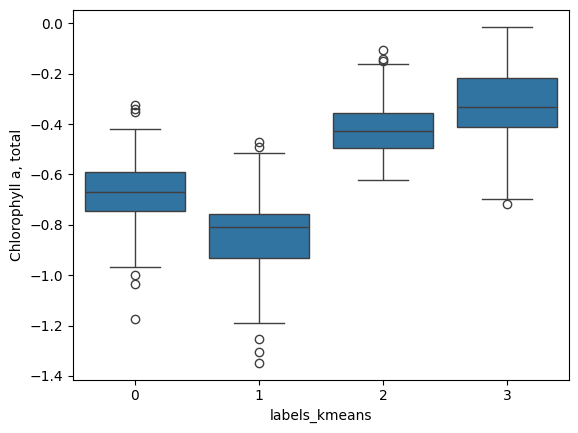

In [63]:
colonnes=["Chlorophyll a, total","Divinyl chlorophyll a","19-Hexanoyloxyfucoxanthin","Fucoxanthin","Zeaxanthin"]
seaborn.boxplot(DATA_season, x="labels_kmeans",y=colonnes[0])

<Axes: xlabel='labels_kmeans', ylabel='Divinyl chlorophyll a'>

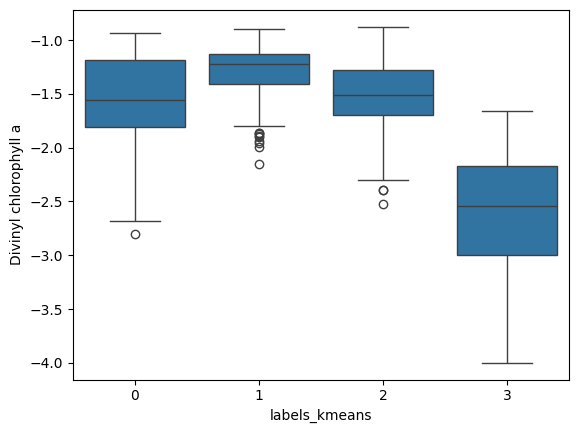

In [64]:
seaborn.boxplot(DATA_season, x="labels_kmeans",y=colonnes[1])

<Axes: xlabel='labels_kmeans', ylabel='19-Hexanoyloxyfucoxanthin'>

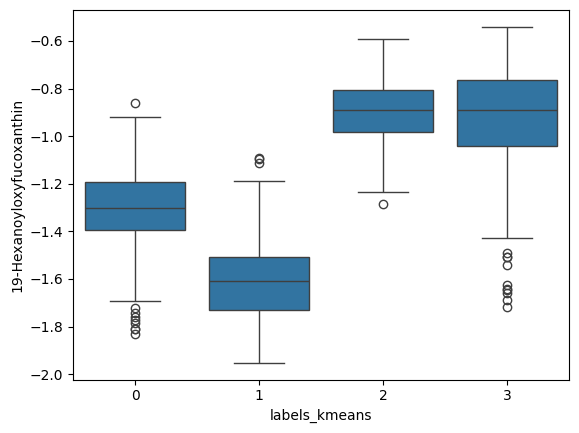

In [65]:
seaborn.boxplot(DATA_season, x="labels_kmeans",y=colonnes[2])

<Axes: xlabel='labels_kmeans', ylabel='Fucoxanthin'>

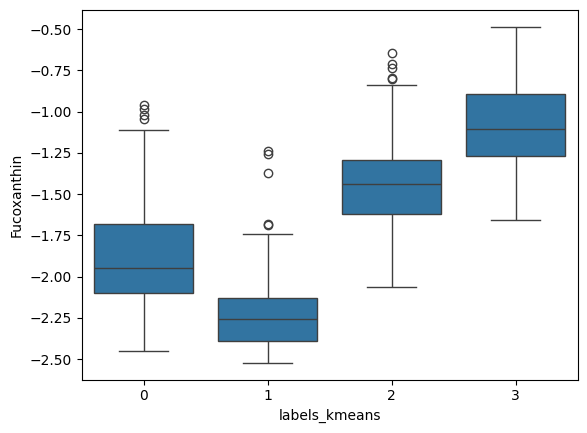

In [66]:
seaborn.boxplot(DATA_season, x="labels_kmeans",y=colonnes[3])

<Axes: xlabel='labels_kmeans', ylabel='Zeaxanthin'>

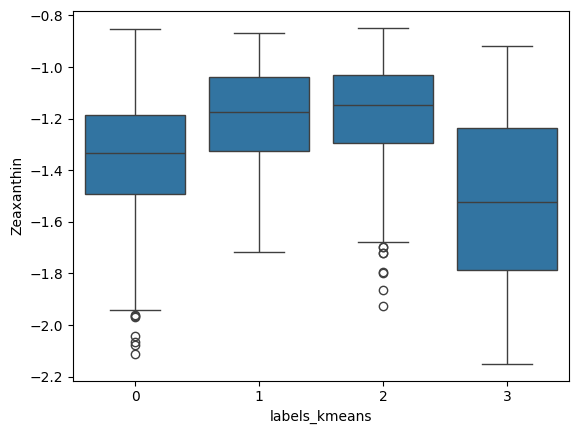

In [67]:
seaborn.boxplot(DATA_season, x="labels_kmeans",y=colonnes[4])

In [68]:
DATA_label = pd.concat([data_log.copy().reset_index(), new_dfa["labels_kmeans"]],axis = 1)
DATA_label = DATA_label.drop(columns=["index"])

In [69]:
data_label = (DATA_label.groupby("labels_kmeans", as_index=False))
data_label.sample(6)

,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin,labels_kmeans
236,-0.628932,-1.130768,-1.619789,-1.026872,-1.585027,-2.154902,-2.522879,-2.397940,-1.327902,0
103,-0.591082,-2.443697,-1.860121,-1.809668,-2.366532,-1.241845,-1.962574,-2.769551,-1.333482,0
604,-0.673664,-1.060481,-1.769551,-1.221849,-1.638272,-2.000000,-2.397940,-2.698970,-1.031517,0
365,-0.777284,-1.154902,-1.853872,-1.366532,-1.958607,-2.000000,-2.154902,-2.698970,-0.974694,0
298,-0.651695,-1.119186,-1.638272,-1.267606,-1.744727,-2.045757,-2.301030,-3.000000,-0.920819,0
342,-0.752493,-1.708204,-2.023834,-1.287295,-1.638514,-1.748494,-2.574140,-2.039205,-1.706815,0
523,-1.303993,-1.706416,-2.730487,-1.799971,-2.306273,-2.510042,-2.790485,-3.721246,-1.410274,1
20,-0.812197,-1.170696,-1.850781,-1.703335,-2.130768,-1.966576,-2.468521,-4.000000,-1.184422,1
377,-0.806875,-1.113509,-2.096910,-1.481486,-2.045757,-2.221849,-2.698970,-3.000000,-0.954677,1
204,-0.984221,-1.215383,-2.292430,-1.853872,-2.080922,-2.366532,-2.698970,-4.000000,-1.288193,1


0         Axes(0.1,0.559091;0.363636x0.340909)
1    Axes(0.536364,0.559091;0.363636x0.340909)
2             Axes(0.1,0.15;0.363636x0.340909)
3        Axes(0.536364,0.15;0.363636x0.340909)
dtype: object

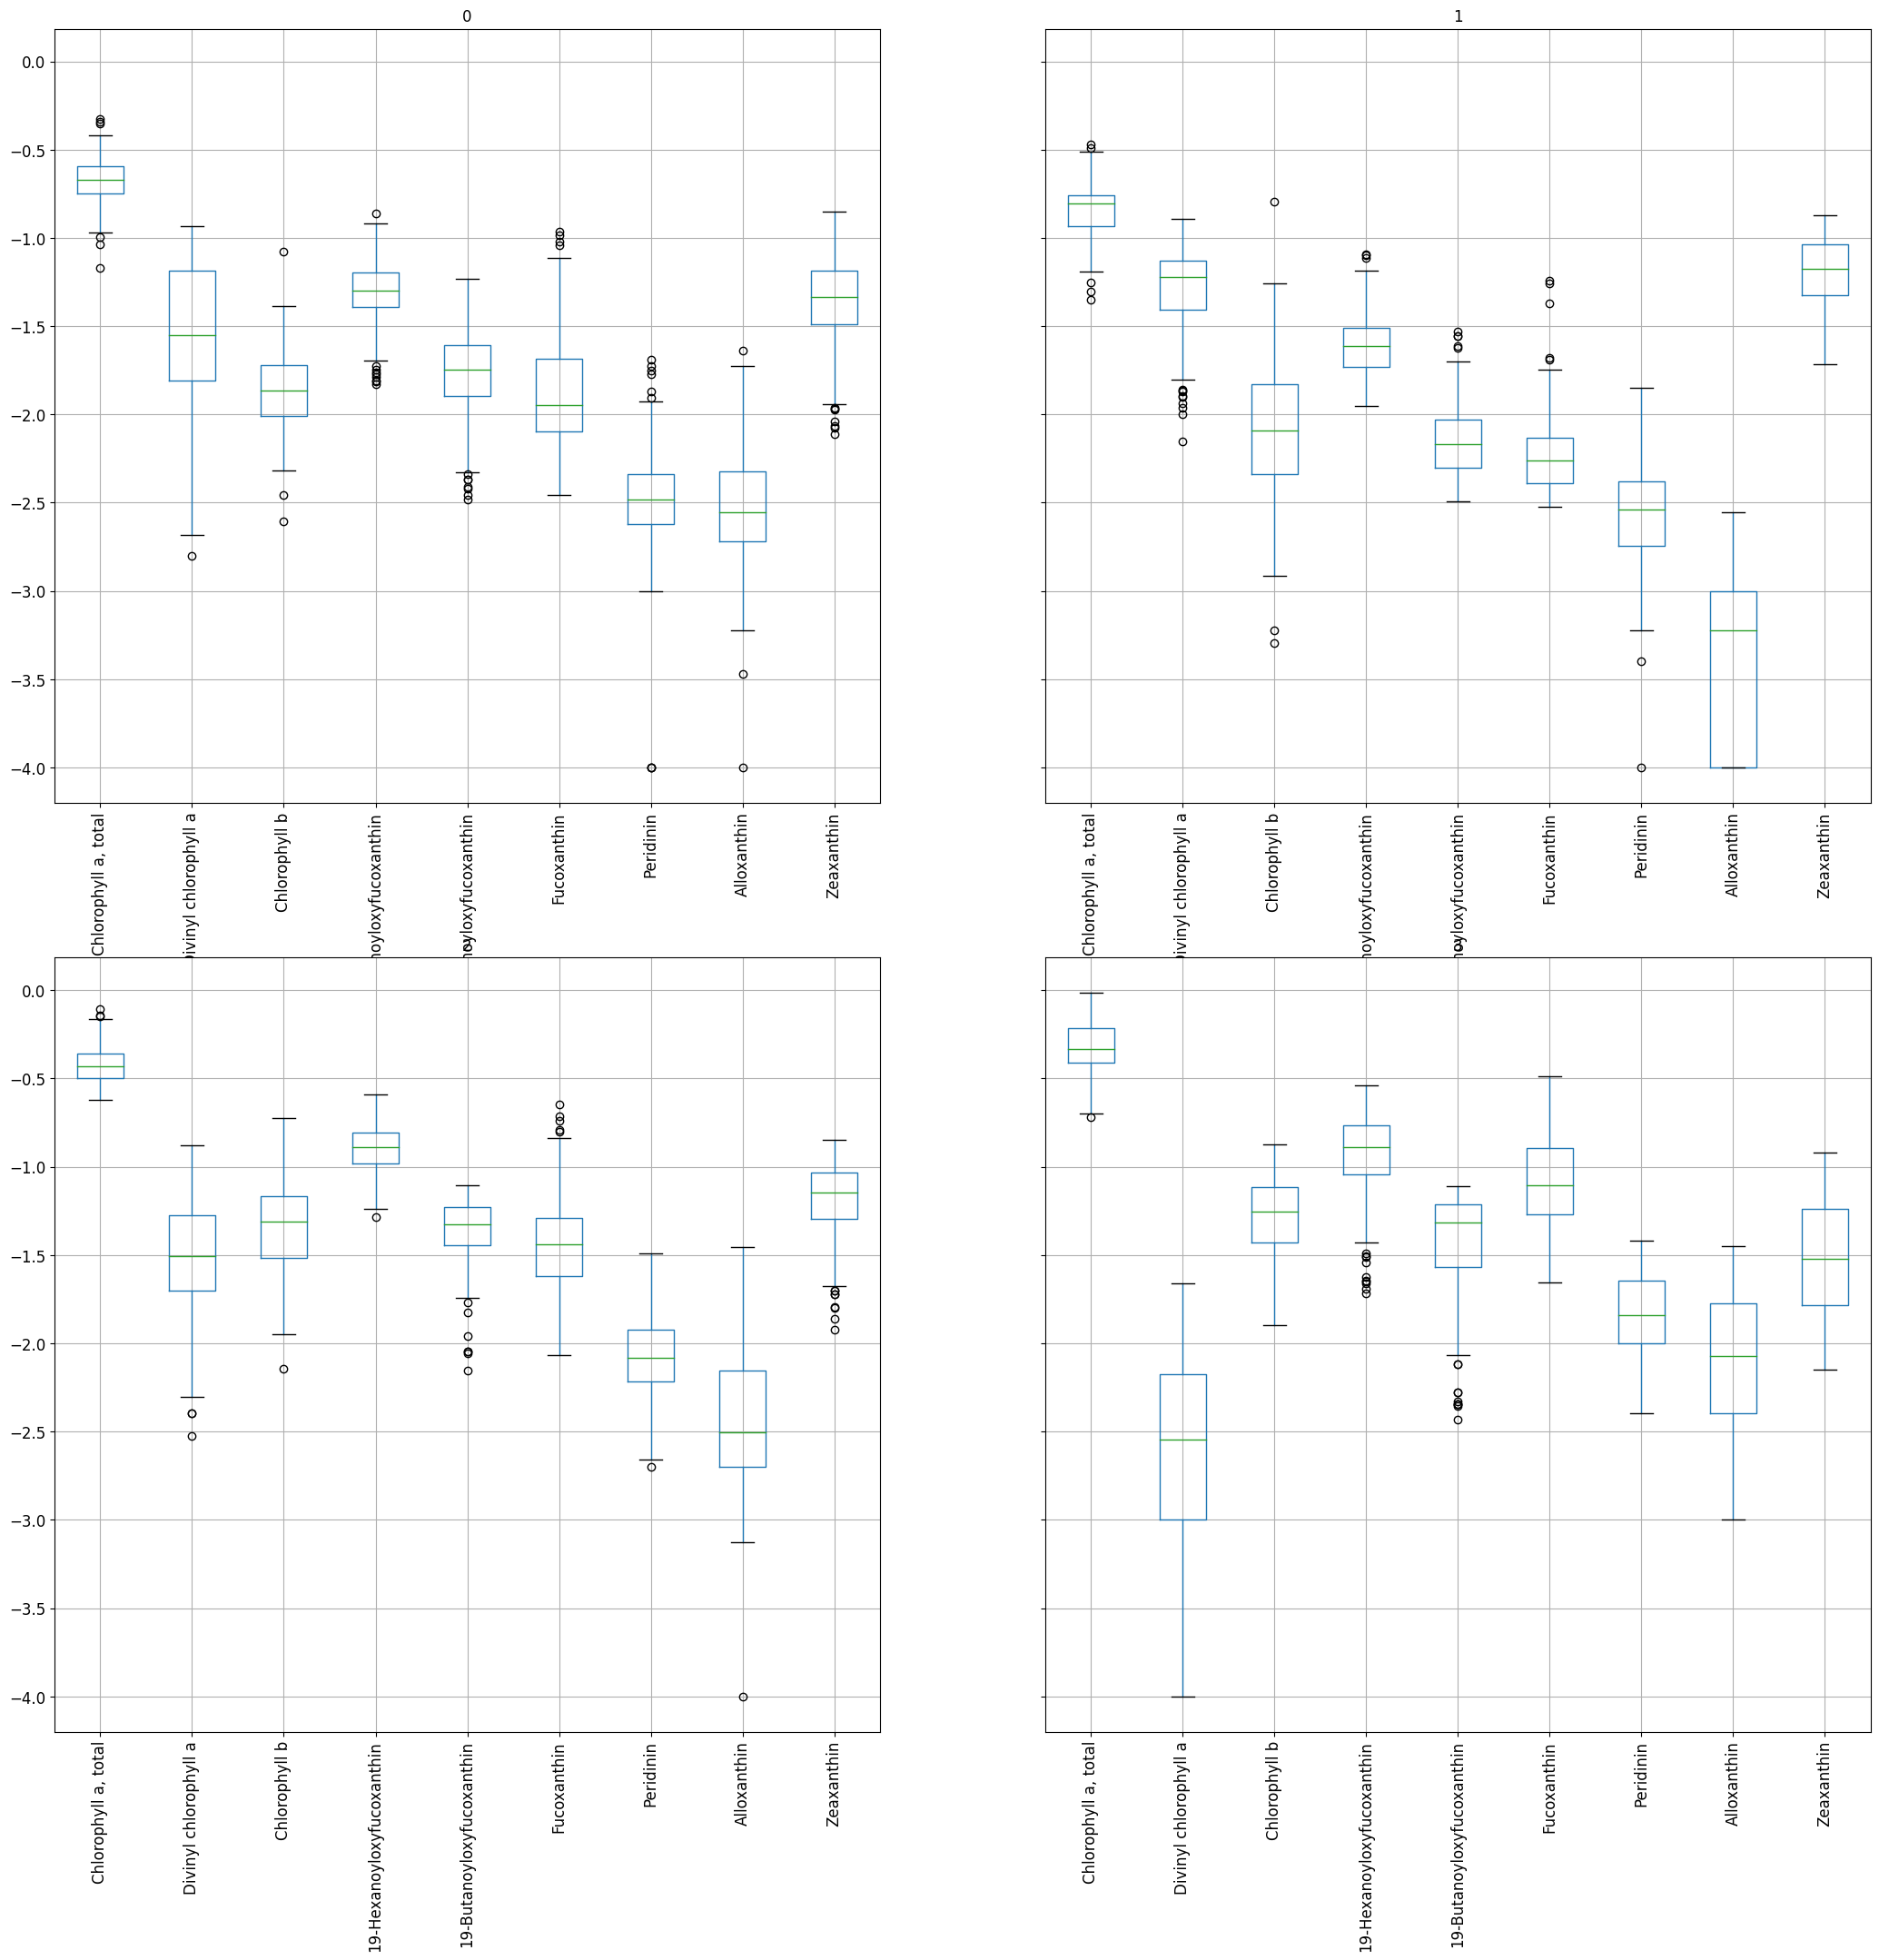

In [70]:
data_label.boxplot(column=["Chlorophyll a, total", "Divinyl chlorophyll a", "Chlorophyll b", "19-Hexanoyloxyfucoxanthin", "19-Butanoyloxyfucoxanthin", "Fucoxanthin", "Peridinin", "Alloxanthin", "Zeaxanthin"], rot=90, fontsize=12, figsize=(25,25))